In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Instagram-Reach.csv')

In [3]:
data['Date'] = pd.to_datetime(data['Date'])

(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.,
        120000., 140000., 160000., 180000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

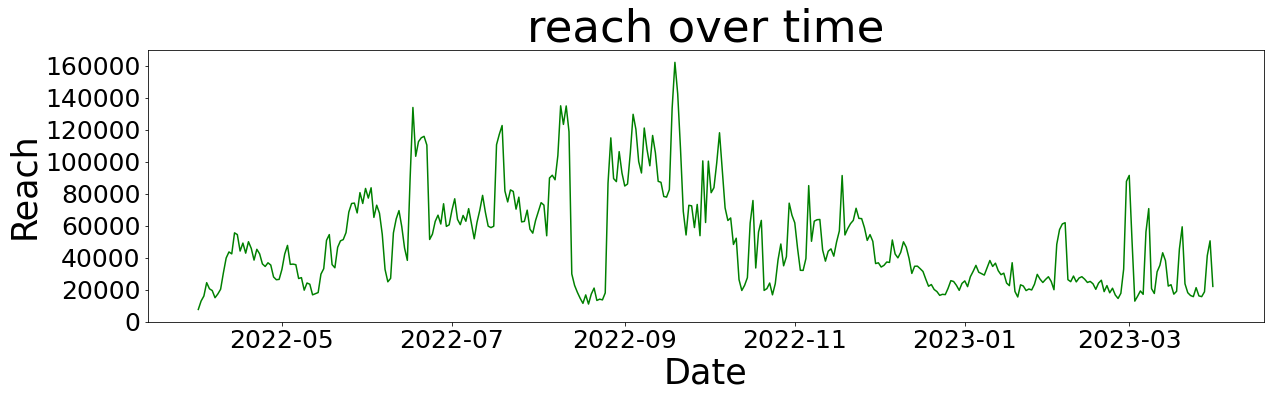

In [4]:
plt.figure(figsize = (20,5))
plt.plot(data['Date'], data['Instagram reach'], label ='reach over time', color = 'green')
plt.title('reach over time', fontsize = 45)
plt.xlabel('Date', fontsize = 35)
plt.ylabel('Reach', fontsize = 35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

In [11]:
data['day'] = data['Date'].dt.day_name()

In [45]:
data.set_index('Date', inplace=True)
data

,Instagram reach
Date,
2022-04-01,7620
2022-04-02,12859
2022-04-03,16008
2022-04-04,24349
2022-04-05,20532
...,...
2023-03-27,15622
2023-03-28,18645
2023-03-29,41238


In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

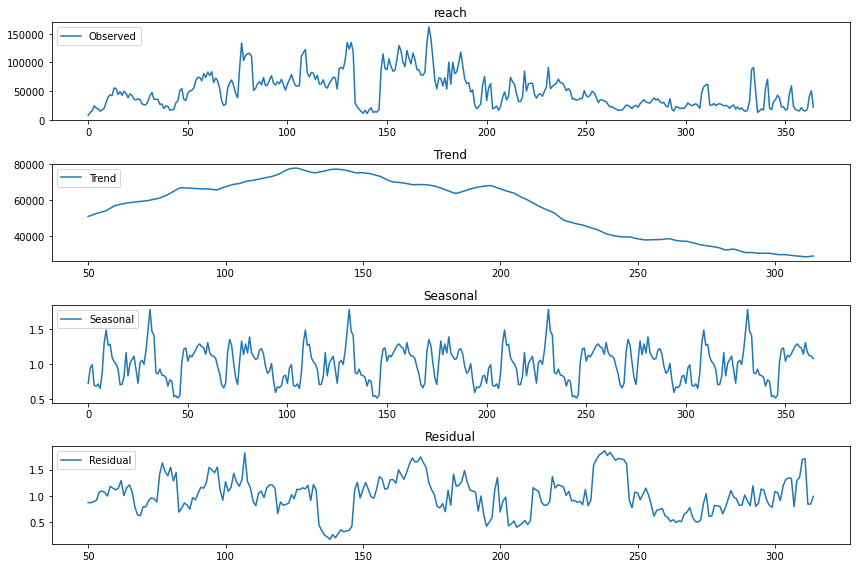

In [6]:
result = seasonal_decompose(data['Instagram reach'], model='multiplicative', period=100)

# Plot the decomposed components (trend, seasonal, and residual)
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(result.observed, label='Observed')
plt.legend(loc='upper left')
plt.title('reach')
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend')
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('Seasonal')
plt.subplot(414)
plt.plot(result.resid, label='Residual')
plt.legend(loc='upper left')
plt.title( 'Residual')
plt.tight_layout()
plt.show()

In [7]:
from statsmodels.tsa.stattools import adfuller
res = adfuller(data['Instagram reach'], autolag = 'AIC')
p_value= res[1]
p_value

5.4149896029678974e-05

H0 - it is not stationary

H1 - it is stationary

The p-value from the adfuller test is very small which means and < 0,05 so we reject the null hypothesis and define our time series as stationary, so the D parameter of ARIMA model is going to be set to 1, as it doesn't need differencing. 

**First we will use the auto_arima model to check which set of parameters is optimal basing on the AIC score (we want to minimize the value of AIC)**

In [8]:
from pmdarima import auto_arima

In [9]:
stepwise_fit = auto_arima(data['Instagram reach'], 
                          trace = True, #prints out every step 
                         supress_warnings=True) #does not print out warnings
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8056.706, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8084.120, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8086.088, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8086.089, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8082.124, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8054.829, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=8073.220, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8060.676, Time=0.06 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=8056.632, Time=0.12 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=8066.191, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8055.487, Time=0.07 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=8057.398, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=8052.464, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=8071.227, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 1, 2)   Log Likelihood               -4022.232
Date:                Mon, 23 Oct 2023   AIC                           8052.464
Time:                        21:18:13   BIC                           8068.053
Sample:                             0   HQIC                          8058.660
                                - 365                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6809      0.063     10.871      0.000       0.558       0.804
ma.L1         -0.7494      0.068    -11.097      0.000      -0.882      -0.617
ma.L2         -0.1889      0.051     -3.729      0.000      -0.288      -0.090
sigma2      2.441e+08   2.15e-10   1.14e+18      0.000    2.44e+08    2.44e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               248.22
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.78   Skew:                             0.15
Prob(H) (two-sided):                  0.17   Kurtosis:                         7.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.69e+33. Standard errors may be unstable.
"""

**The parameters we wanted to establish are:**

**AR(p) - number of lagged values needed to be added or substracted from the label column**

**I(d) - differencing, if the data is stationary the value is 0, if it is seasonal the value is 1**

**MA(q) - moving average/ number of lagged values for the error term added or substracted from the label column**

**We can see that the optimal set of parameters is p=1, d=1 and q=2**

Now we split the dataset into training and testing sets to check how the model predicts our data on the test set.

In [10]:
data.shape
train = data.iloc[:-30,]
test = data.iloc[-30:,]

In [11]:
from statsmodels.tsa.arima.model import ARIMA
model= ARIMA(train['Instagram reach'], order=(1,1,2))
model = model.fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        Instagram reach   No. Observations:                  335
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -3687.585
Date:                Mon, 23 Oct 2023   AIC                           7383.171
Time:                        21:18:22   BIC                           7398.416
Sample:                             0   HQIC                          7389.249
                                - 335                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7511      0.066     11.405      0.000       0.622       0.880
ma.L1         -0.8244      0.072    -11.424      0.000      -0.966      -0.683
ma.L2         -0.1265      0.053     -2.365      0.018      -0.231      -0.022
sigma2      2.409e+08   3.11e-10   7.73e+17      0.000    2.41e+08    2.41e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               330.92
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.55   Skew:                             0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.47e+33. Standard errors may be unstable.
"""

In [12]:
pred = model.predict(len(train), len(train)+len(test), typ='levels')
print(pred)

335    79828.200307
336    70018.647099
337    62651.020075
338    57117.442060
339    52961.356858
340    49839.860394
341    47495.408898
342    45734.569862
343    44412.062610
344    43418.771686
345    42672.744124
346    42112.427798
347    41691.592962
348    41375.518005
349    41138.124686
350    40959.826511
351    40825.912721
352    40725.334556
353    40649.793663
354    40593.057428
355    40550.444741
356    40518.439778
357    40494.401922
358    40476.347892
359    40462.788116
360    40452.603821
361    40444.954738
362    40439.209769
363    40434.894914
364    40431.654171
365    40429.220158
Name: predicted_mean, dtype: float64


<AxesSubplot:>

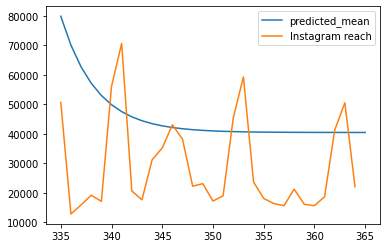

In [13]:
pred.plot(legend=True)
test['Instagram reach'].plot(legend=True)

The predictions show that the ARIMA model does not work well with our data. That suggests us to change the model as our data is probably affected by seasonality. We will train the SARIMA model now

In [15]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=sm.tsa.statespace.SARIMAX(train['Instagram reach'],
                                order=(1, 1, 2),
                                seasonal_order=(1, 1, 2, 12)
                               )
model = model.fit()
model.summary()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07697D+01    |proj g|=  3.08288D-02

At iterate    5    f=  1.07620D+01    |proj g|=  8.95738D-03

At iterate   10    f=  1.07599D+01    |proj g|=  2.68658D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     13     15      1     0     0   2.167D-05   1.076D+01
  F =   10.759881406951067     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                    Instagram reach   No. Observations:                  335
Model:             SARIMAX(1, 1, 2)x(1, 1, 2, 12)   Log Likelihood               -3604.560
Date:                            Mon, 23 Oct 2023   AIC                           7223.121
Time:                                    21:18:50   BIC                           7249.542
Sample:                                         0   HQIC                          7233.669
                                            - 335                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7415      0.124      5.968      0.000       0.498       0.985
ma.L1         -0.8023      0.146     -5.481      0.000      -1.089      -0.515
ma.L2         -0.1404      0.109     -1.291      0.197      -0.354       0.073
ar.S.L12      -0.5604      1.192     -0.470      0.638      -2.896       1.775
ma.S.L12      -0.3435      1.253     -0.274      0.784      -2.799       2.112
ma.S.L24      -0.4427      1.082     -0.409      0.683      -2.564       1.678
sigma2       4.95e+08   2.12e-09   2.33e+17      0.000    4.95e+08    4.95e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               230.47
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.59   Skew:                             0.34
Prob(H) (two-sided):                  0.01   Kurtosis:                         7.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.84e+33. Standard errors may be unstable.
"""

In [16]:
pred = model.predict(len(train), len(train)+len(test), typ='levels')
print(pred)

335    77790.145844
336    61255.514943
337    56449.922484
338    48684.913871
339    47849.564031
340    44581.568355
341    40572.867919
342    38436.818122
343    39384.337366
344    41411.138256
345    45341.053312
346    45447.895819
347    42396.919403
348    36150.334219
349    37256.198975
350    34441.490386
351    36756.784464
352    36051.022690
353    33907.217293
354    33078.222099
355    35128.768927
356    39366.161704
357    47624.256089
358    48558.617288
359    44877.757836
360    37252.970782
361    38299.126929
362    35122.360913
363    37460.565804
364    36645.091328
365    34439.526936
Name: predicted_mean, dtype: float64


<AxesSubplot:>

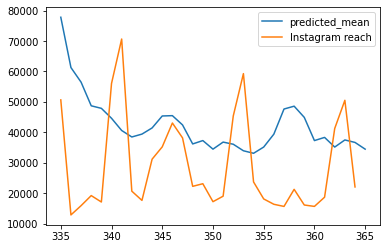

In [17]:
pred.plot(legend=True)
test['Instagram reach'].plot(legend=True)

we can see how SARIMAX model works better with our train data, so we will now train it on the entire dataset and make predictions for the next 30 days.

In [18]:
model=sm.tsa.statespace.SARIMAX(data['Instagram reach'],
                                order=(1, 1, 2),
                                seasonal_order=(1, 1, 2, 12))
model = model.fit()
model.summary()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07988D+01    |proj g|=  2.60229D-02

At iterate    5    f=  1.07928D+01    |proj g|=  1.00498D-03

At iterate   10    f=  1.07926D+01    |proj g|=  2.19830D-03

At iterate   15    f=  1.07926D+01    |proj g|=  2.14138D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     15     17      1     0     0   2.141D-05   1.079D+01
  F =   10.792625727269922     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                    Instagram reach   No. Observations:                  365
Model:             SARIMAX(1, 1, 2)x(1, 1, 2, 12)   Log Likelihood               -3939.308
Date:                            Mon, 23 Oct 2023   AIC                           7892.617
Time:                                    21:19:16   BIC                           7919.662
Sample:                                         0   HQIC                          7903.380
                                            - 365                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6920      0.114      6.086      0.000       0.469       0.915
ma.L1         -0.7461      0.130     -5.726      0.000      -1.002      -0.491
ma.L2         -0.1921      0.100     -1.928      0.054      -0.387       0.003
ar.S.L12      -0.5720      2.447     -0.234      0.815      -5.368       4.224
ma.S.L12      -0.3090      2.501     -0.124      0.902      -5.210       4.592
ma.S.L24      -0.4746      2.166     -0.219      0.827      -4.719       3.770
sigma2      4.877e+08   1.39e-08   3.51e+16      0.000    4.88e+08    4.88e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               184.72
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.73   Skew:                             0.29
Prob(H) (two-sided):                  0.09   Kurtosis:                         6.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.12e+33. Standard errors may be unstable.
"""

In [19]:
pred = model.predict(len(data), len(data)+100, typ='levels')
print(pred)

365    20500.081274
366    12478.928391
367    15367.116026
368    21314.497871
369    27844.358468
           ...     
461    16959.315942
462     6025.374910
463     6842.069218
464    11314.110455
465    17113.221277
Name: predicted_mean, Length: 101, dtype: float64


And here we can see the graph with our predicted values

<AxesSubplot:>

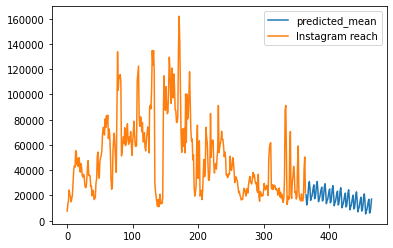

In [20]:
pred.plot(legend=True)
data['Instagram reach'].plot(legend=True)